In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt # for plotting
import torch.optim as optim #for gradient descent
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

https://www.kaggle.com/discussions/general/74235
follow instructions

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
#kaggle datasets download -d tusharpadhy/deepfake-dataset

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cecilia0999","key":"cc1406dbb42304ade9f37c8885076ba5"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
!kaggle datasets download -d tusharpadhy/deepfake-dataset


ref                                                                     title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                                     Online Food Dataset                                  3KB  2024-03-02 18:50:30          15260        313  0.9411765        
sukhmandeepsinghbrar/car-price-prediction-dataset                       Car Price Prediction Dataset                       141KB  2024-03-28 08:27:39            735         28  1.0              
prishasawhney/imdb-dataset-top-2000-movies                              IMDB Dataset (Top 2000 movies)                      75KB  2024-03-27 18:51:36            683         24  1.0              
syedanwarafridi/vehicle-s

In [ ]:
! mkdir dataset
! unzip deepfake-dataset.zip -d dataset

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import PIL
import urllib
import os
import torchvision
from torchvision import datasets, models, transforms


# Check if GPU is available
if torch.cuda.is_available():
    print("GPU is enabled")
else:
    print("GPU is not enabled")

!nvidia-smi

GPU is enabled
Mon Apr  1 00:14:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0              45W / 400W |      5MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------

In [ ]:
from torchvision import datasets, transforms
import os

def remove_duplicates(dataset):
    unique_items = {}
    for img, label in dataset.imgs:  # Iterate through the list of tuples (image_path, label)
        img_hash = hash(img)  # Hash the image path
        if img_hash not in unique_items:  # If this hash is not already in the unique items dict
            unique_items[img_hash] = (img, label)  # Add it

    # Rebuild the dataset imgs attribute with only unique items
    dataset.imgs = list(unique_items.values())
    dataset.samples = dataset.imgs  # In some versions, .samples is used instead of .imgs


In [ ]:
from torchvision import transforms, datasets
import torch
import matplotlib.pyplot as plt
import numpy as np


batch_size = 256
# Directories for your datasets
train_dir = '/content/dataset/train'
test_dir = '/content/dataset/test'
val_dir = '/content/dataset/valid'

# Transformation for resizing and converting images to Tensor
data_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                      transforms.ToTensor()])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=data_transform)
test_dataset = datasets.ImageFolder(test_dir, transform=data_transform)
val_dataset = datasets.ImageFolder(val_dir, transform=data_transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Mapping from index to class
idx_to_class = {v: k for k, v in train_dataset.class_to_idx.items()}

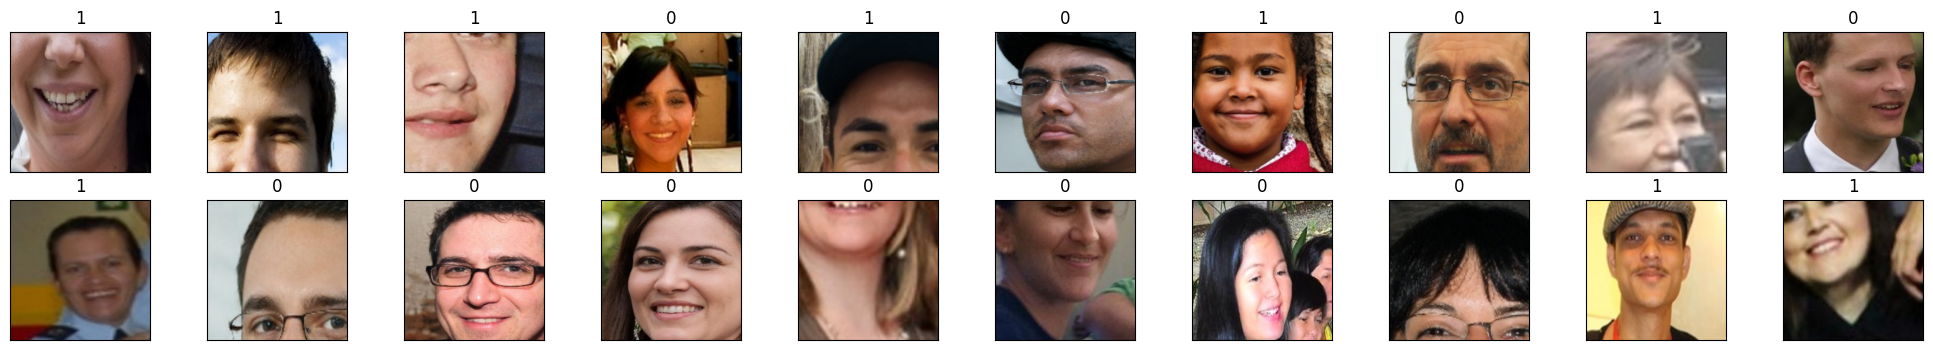

In [ ]:
# Visualize some sample data
# Obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()  # Convert images to numpy for display

# Plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    # Use the mapping to display the correct class name
    #label = idx_to_class[labels[idx].item()]
   # ax.set_title(labels)
    ax.set_title(labels[idx].item())
#0 false 1 true
plt.show()

### **AlexNet**

In [ ]:
!pip install keras_preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split

Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def alexnet_model():
    # Start off the model
    model = Sequential()
    # 1st Convolution layer
    model.add(Conv2D(input_shape=(227, 227, 3), filters=96, kernel_size=(11, 11), strides=(4, 4), padding='valid'))
    model.add(Activation('relu'))

    # max pooling 1st layer
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
    model.add(BatchNormalization())

    # 2nd Convolution layer
    model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding='valid'))
    model.add(Activation('relu'))
    # max pooling for 2nd layer
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
    model.add(BatchNormalization())

    # 3rd Convolution layer
    model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
    model.add(Activation('relu'))

    # 4th Convolution layer
    model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
    model.add(Activation('relu'))

    # 5th Convolution layer
    model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
    model.add(Activation('relu'))

    # max pooling for 5th layer
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

    # dense layer
    model.add(Flatten())
    # 1st dense layer
    model.add(Dense(4096, input_shape=(6 * 6 * 256,)))
    model.add(Activation('relu'))
    # dropout to prevent overfitting
    model.add(Dropout(0.4))

    # 2nd dense layer
    model.add(Dense(4096))
    model.add(Activation('relu'))
    # dropout to prevent overfitting
    model.add(Dropout(0.4))
    model.add(BatchNormalization())

    # 3rd dense layer
    model.add(Dense(1000))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    # output layer
    model.add(Dense(2))
    model.add(Activation('softmax'))

    # Uncomment line below to see architecture detail
    # model.summary()

    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    return model


DATA Processing

Train
train: Val = 4:1
train : test = 8 :1

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

def dataset_train_processing():
    # Directories for your datasets
    train_dir = '/content/dataset/train'
    test_dir = '/content/dataset/test'
    val_dir = '/content/dataset/valid'

    batch_size = 256

    # Preprocessing and data augmentation configuration for training
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Just normalization for validation and test sets
    test_val_datagen = ImageDataGenerator(rescale=1./255)

    # Prepare data loaders
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(227, 227),
        batch_size=batch_size,
        class_mode='categorical'
    )

    validation_generator = test_val_datagen.flow_from_directory(
        val_dir,
        target_size=(227, 227),
        batch_size=batch_size,
        class_mode='categorical'
    )

    test_generator = test_val_datagen.flow_from_directory(
        test_dir,
        target_size=(227, 227),
        batch_size=batch_size,
        class_mode='categorical'
    )

    return train_generator, validation_generator, test_generator, train_generator.samples, validation_generator.samples, test_generator.samples

# Example usage
# train_gen, val_gen, test_gen, train_size, val_size, test_size = dataset_train_processing_tf()


In [ ]:
# Instantiate a model
model = alexnet_model()

# Process training data
train_gen, validate_gen,test_gen, train_total, validate_total,test_total = dataset_train_processing()

# Train model
batch_size = 256
epochs = 10
train_model = model.fit_generator(train_gen,
                                 epochs=epochs,
                                 validation_data=validate_gen,
                                 validation_steps=validate_total//batch_size,
                                 steps_per_epoch=train_total//batch_size)

#model.save_weights('/content/drive/MyDrive/APS360/alexnet.h5')

Found 240002 images belonging to 2 classes.
Found 59428 images belonging to 2 classes.
Found 30905 images belonging to 2 classes.


<ipython-input-17-28fe047379fe>:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train_model = model.fit_generator(train_gen,


Epoch 1/10
937/937 [==============================] - 2753s 3s/step - loss: 0.6604 - accuracy: 0.6322 - val_loss: 0.5133 - val_accuracy: 0.7418
Epoch 2/10
937/937 [==============================] - 2745s 3s/step - loss: 0.4191 - accuracy: 0.8011 - val_loss: 0.3844 - val_accuracy: 0.8253
Epoch 3/10
937/937 [==============================] - 2756s 3s/step - loss: 0.3232 - accuracy: 0.8558 - val_loss: 0.3094 - val_accuracy: 0.8667
Epoch 4/10
937/937 [==============================] - 2736s 3s/step - loss: 0.2740 - accuracy: 0.8826 - val_loss: 0.2583 - val_accuracy: 0.8855
Epoch 5/10
937/937 [==============================] - 2735s 3s/step - loss: 0.2394 - accuracy: 0.9001 - val_loss: 0.2670 - val_accuracy: 0.8900
Epoch 6/10
937/937 [==============================] - 2746s 3s/step - loss: 0.2181 - accuracy: 0.9104 - val_loss: 0.3187 - val_accuracy: 0.8742
Epoch 7/10
937/937 [==============================] - 2741s 3s/step - loss: 0.1979 - accuracy: 0.9203 - val_loss: 0.2324 - val_accuracy:

<ipython-input-4-8a558092f396>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b',color = 'red' ,label='Training loss')


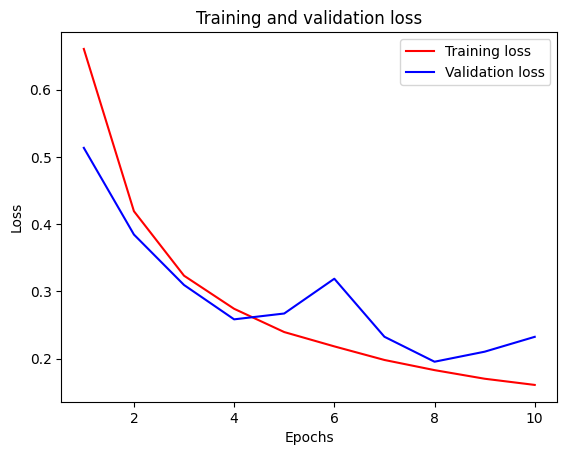

<ipython-input-4-8a558092f396>:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'b', color = 'red',label='Training accuracy')


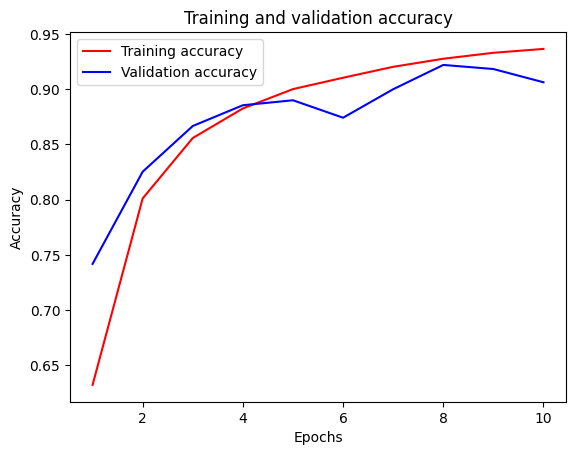

In [4]:
import matplotlib.pyplot as plt

# Training history
loss = [0.6604, 0.4191, 0.3232, 0.2740, 0.2394, 0.2181, 0.1979, 0.1828, 0.1700, 0.1608]
accuracy = [0.6322, 0.8011, 0.8558, 0.8826, 0.9001, 0.9104, 0.9203, 0.9276, 0.9330, 0.9365]

val_loss = [0.5133, 0.3844, 0.3094, 0.2583, 0.2670, 0.3187, 0.2324, 0.1953, 0.2102, 0.2323]
val_accuracy = [0.7418, 0.8253, 0.8667, 0.8855, 0.8900, 0.8742, 0.9000, 0.9220, 0.9183, 0.9063]

epochs = range(1, len(loss) + 1)

# Plotting loss
plt.plot(epochs, loss, 'b',color = 'red' ,label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.grid(True)
plt.show()

# Plotting accuracy
plt.plot(epochs, accuracy, 'b', color = 'red',label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
#plt.grid(True)
plt.show()


**save weights**

In [ ]:
model.save_weights('alexnet1.h5')

NameError: name 'model' is not defined

Reference(https://github.com/Insignite/Alexnet-DogvsCat-Classification/blob/master/Keras_Cat_Dog_Classification.ipynb)

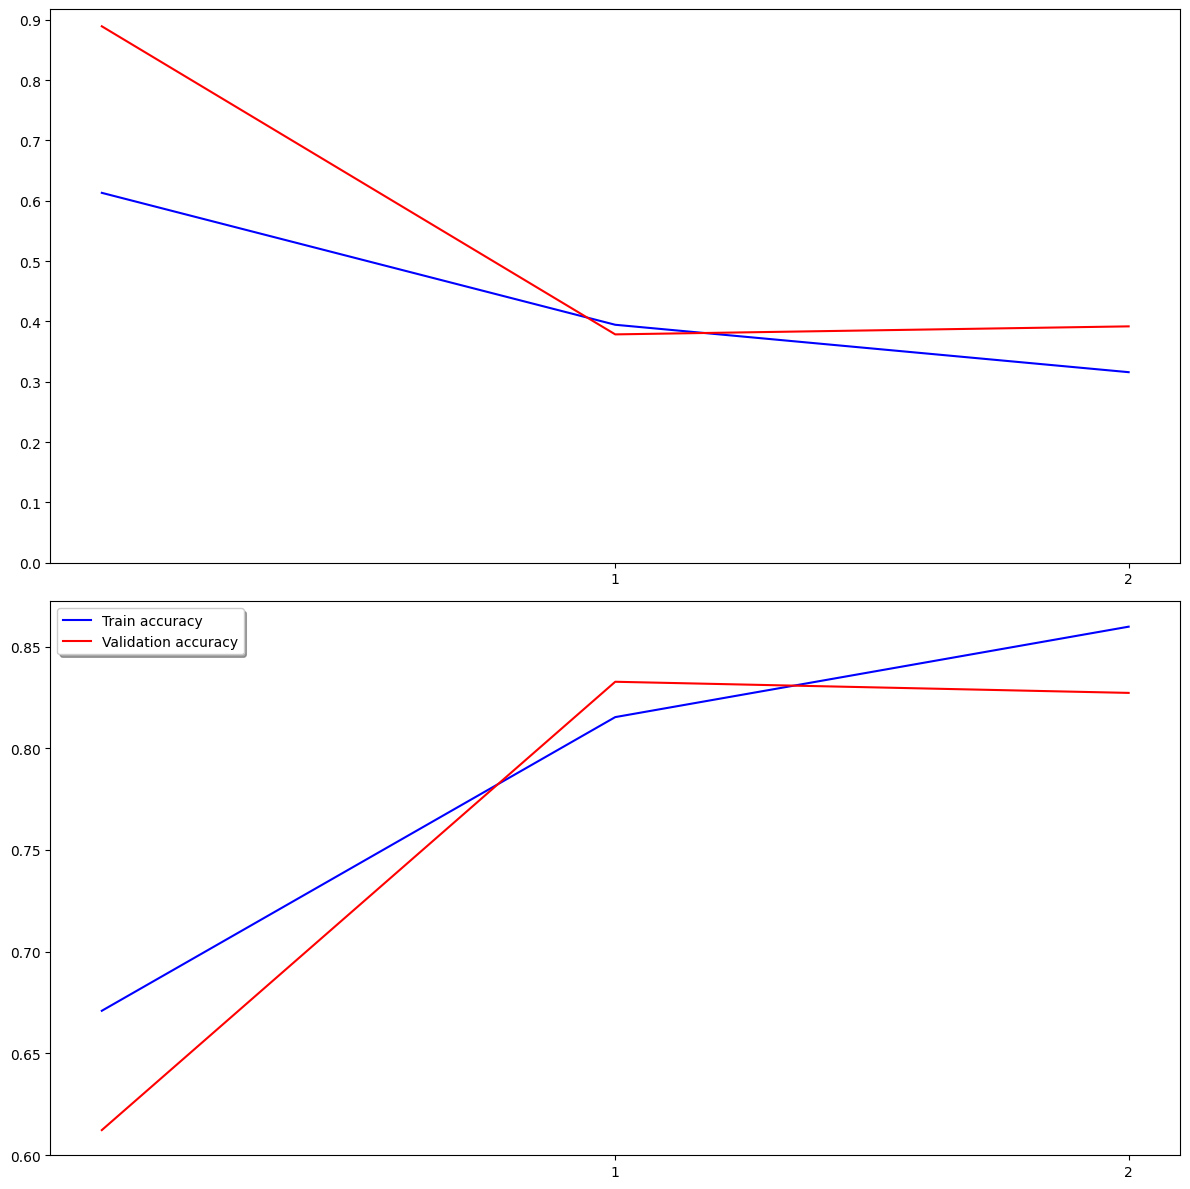

In [ ]:
# Graphing the result
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(train_model.history['loss'], color='b', label="Train loss")
ax1.plot(train_model.history['val_loss'], color='r', label="Validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(train_model.history['accuracy'], color='b', label="Train accuracy")
ax2.plot(train_model.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
prediction = model.predict_generator(test_gen, steps=np.ceil(test_total/batch_size))
# Prediction return list of probability for each classes
# argmax use to get average max for each row


In [2]:
#alex
# Total samples
total_train_samples = 937
total_val_samples = 937

# Train and validation accuracies
train_accuracy = 0.9276
val_accuracy = 0.9220

# Calculate true positives and true negatives
TP = train_accuracy * total_train_samples
TN = val_accuracy * total_val_samples

# Calculate false positives and false negatives
FP = total_train_samples - TP
FN = total_val_samples - TN

# Precision
precision = TP / (TP + FP)

# Recall
recall = TP / (TP + FN)

# F1 score
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Precision: 0.9276
Recall: 0.9224343675417661
F1 Score: 0.925009972078181


In [1]:
# Total validation samples
total_samples = 1858

# Validation accuracy for the 10th epoch
val_accuracy = 0.9648

# Number of true positives
TP = int(val_accuracy * total_samples)

# Number of false negatives
FN = total_samples - TP

# Assuming binary classification, false positives and true negatives are complementary to true positives and false negatives
FP = total_samples - TP
TN = total_samples - FN

# Precision
precision = TP / (TP + FP)

# Recall
recall = TP / (TP + FN)

# F1 score
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Precision: 0.9644779332615716
Recall: 0.9644779332615716
F1 Score: 0.9644779332615716
